In [ ]:
from utils import download_cutout_from_zarr

cutout = download_cutout_from_zarr(
    zarr_url="http://bigkahuna.corp.alleninstitute.org/ACdata/hpc/exaspim_ome_zarr/H17_PO12_S4_20250501/exaSPIM.zarr/Pos2/", # copy the url from the image source
    center=(25239, 25044, 1819), # at mip0, copy directly from NG link
    size=(1080, 1080, 256), # at mip0
    out_path=None, # can save as .npy
    mip="1",  # Specify the dataset key if needed
    offset=(0,21279,-1) # under the source of the image
)

Opening TensorStore...
Global center=(25239, 25044, 1819), Offset=[    0 21279    -1], Local center=[12619  1882   910]
Clipped start=[12349, 1612, 846], stop=[12889, 2152, 974], shape=[540, 540, 128]
Dataset shape: zyx = (21860, 7096, 1330)
Saving cutout to  with shape (540, 540, 128)


In [16]:
from skimage import exposure

img_rescale = exposure.equalize_adapthist(cutout, clip_limit=0.03)  # Apply CLAHE for better contrast

In [19]:
# visulization using microviewer
import microviewer
microviewer.view(img_rescale, seg=False)

Viewer server listening to http://localhost:8080



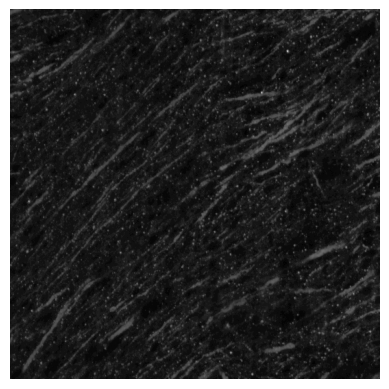

In [18]:
# visulize the midplane of the cutout

import numpy as np
import matplotlib.pyplot as plt
midplane = img_rescale[:, :, img_rescale.shape[2] // 2]  # Get the midplane along the z-axis
plt.imshow(midplane, cmap='gray')
plt.axis('off')
plt.show()
